# Demonstrate Nucleosome Clustering with the Sliding Nucleosome Model

Simulation of the sliding nucleosome model with the following parameters:

- Number of marks: 1
- Correlation in methylation pattern: FALSE
- Maximum number of binders per mark: 2

#### Specify Package Root Directory

In [1]:
import os
import sys

# Get the absolute path of the notebook's directory
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Navigate one level up to get the root directory path
root_directory = os.path.abspath(os.path.join(notebook_directory, '..'))

# Change the working directory to the root directory
os.chdir(root_directory)

# Append the root directory to sys.path
sys.path.append(root_directory)

#### Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sliding_nucleosome.nucleo_arr as nuc
from sliding_nucleosome import mc

#### Initialize Physical Parameters

In [3]:
# Specify physical parameters
J = np.atleast_2d([-3.92])
B = np.atleast_2d([-1.5])
mu = np.array([-10.5])

# Generate a methylation sequence
n_beads = 500
frac_methyl = 0.1
methyl_corr_length = 18.4
marks = nuc.gen_meth(n_beads, frac_methyl, methyl_corr_length)
marks = np.atleast_2d(marks).T

# Specify the polymer
gamma = np.ones(marks.shape[0])
nbi = np.array([2])
linker_corr_length = 45
linker_lengths = np.ones(marks.shape[0])
a = int(np.floor(15.1))
lam = -np.log(1 - 1 / linker_corr_length)

In [4]:
# Let's force the mark profile to match the one that should produce phase separation
marks = np.array(
    [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 2., 1., 1., 1., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 2., 1., 1., 1., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
   1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 2., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   0., 0., 0., 0., 0., 0., 0.]
)
marks = np.atleast_2d(marks).T

In [5]:
# Print the methylation pattern
print("Methylation Pattern (flattened, single mark):\n")
print(marks.flatten())

Methylation Pattern (flattened, single mark):

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 1. 1.
 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 2. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 

#### Initialize the Nucleosome Array

In [6]:
nuc_arr = nuc.NucleosomeArray(
    J = J,
    B = B,
    mu = mu,
    linker_lengths = linker_lengths,
    a = a,
    lam = lam,
    marks = marks,
    Nbi = nbi
)

#### Specify Simulation Parameters

In [7]:
out_dir = "output"
n_steps = 5000
n_save = 10

#### Run the Simulation

In [8]:
mc.mc_linkers(nuc_arr, n_save, n_steps, out_dir)

#### Inspect Configuration

In [9]:
# Extract the linker length distribution
linker_lengths = nuc_arr.linker_lengths

# Print the linker lengths
print("Linker Lengths:")
print(linker_lengths)

Linker Lengths:
[145.  61. 151.  23.  60.   4.  46.  99.  29.  42.  57.   3.   6.  75.
   2.  62.  13.  42.  32.   2.   8.  95.  14.  24.  30.  31.  35.  22.
 113.  13.  13.   1.   2.  19.   4.  25.  44.  84.  98.  60.  67.  38.
  18.  95.   2. 179.  12. 138.  11.  29. 114.  64.  19.  36.  11.  37.
  85.  19.  12.   9.   8.  16.  45.   7.  42.   4. 150.  47.  28.  24.
  28. 111.   4.  62.  13.  65. 122. 121.  14.  27. 175.  15.  24. 177.
  22.  59.  76.  16.  10.  32. 106.   4.  63. 149.  49. 101.   1.  39.
  48.  37.  45.   3. 121.  11.  75.  74.  29.   4.  55.   4.  13.  22.
   4.  11.  32. 107. 105.  29.  16.  17.  65.  13.  11.  15.  30.  51.
  50.  64.   1.  33.  34. 110.  37.  41. 111.   5.  28.   5. 108.  52.
  30.   9.  75.  16.  49.  22.  13.  10.  30. 156.  79.  29.  19. 190.
   8.   9.  81.  33.  23.  32.  82.  16.  20.  71. 159.  27. 146.   3.
  83.   4.  70.  41.  87. 108.  55.  83.  36.   2.  18.  20.  77.  41.
  81.  79.  38. 303. 144.  37.  54.  22.  15.   9.  44.  19. 

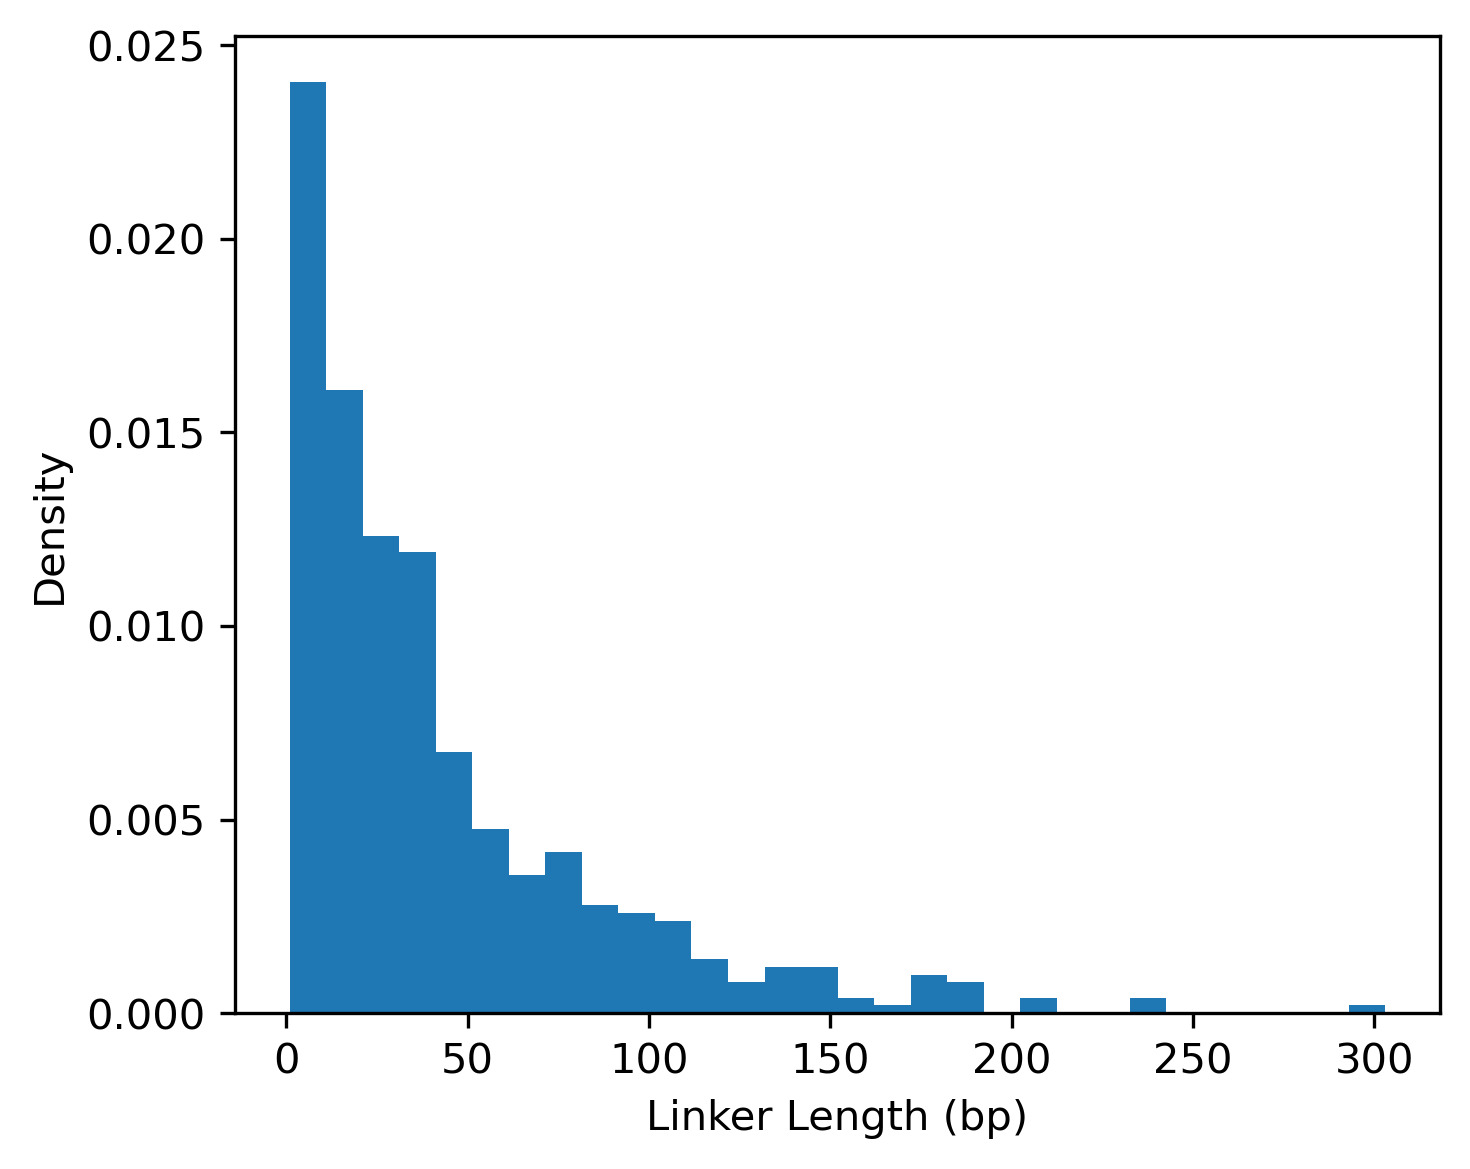

In [10]:
# Plot the linker length distribution
nbins = 30
plt.figure(figsize=(5,4), dpi=300)
plt.hist(linker_lengths, bins=nbins, density=True)
plt.xlabel("Linker Length (bp)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

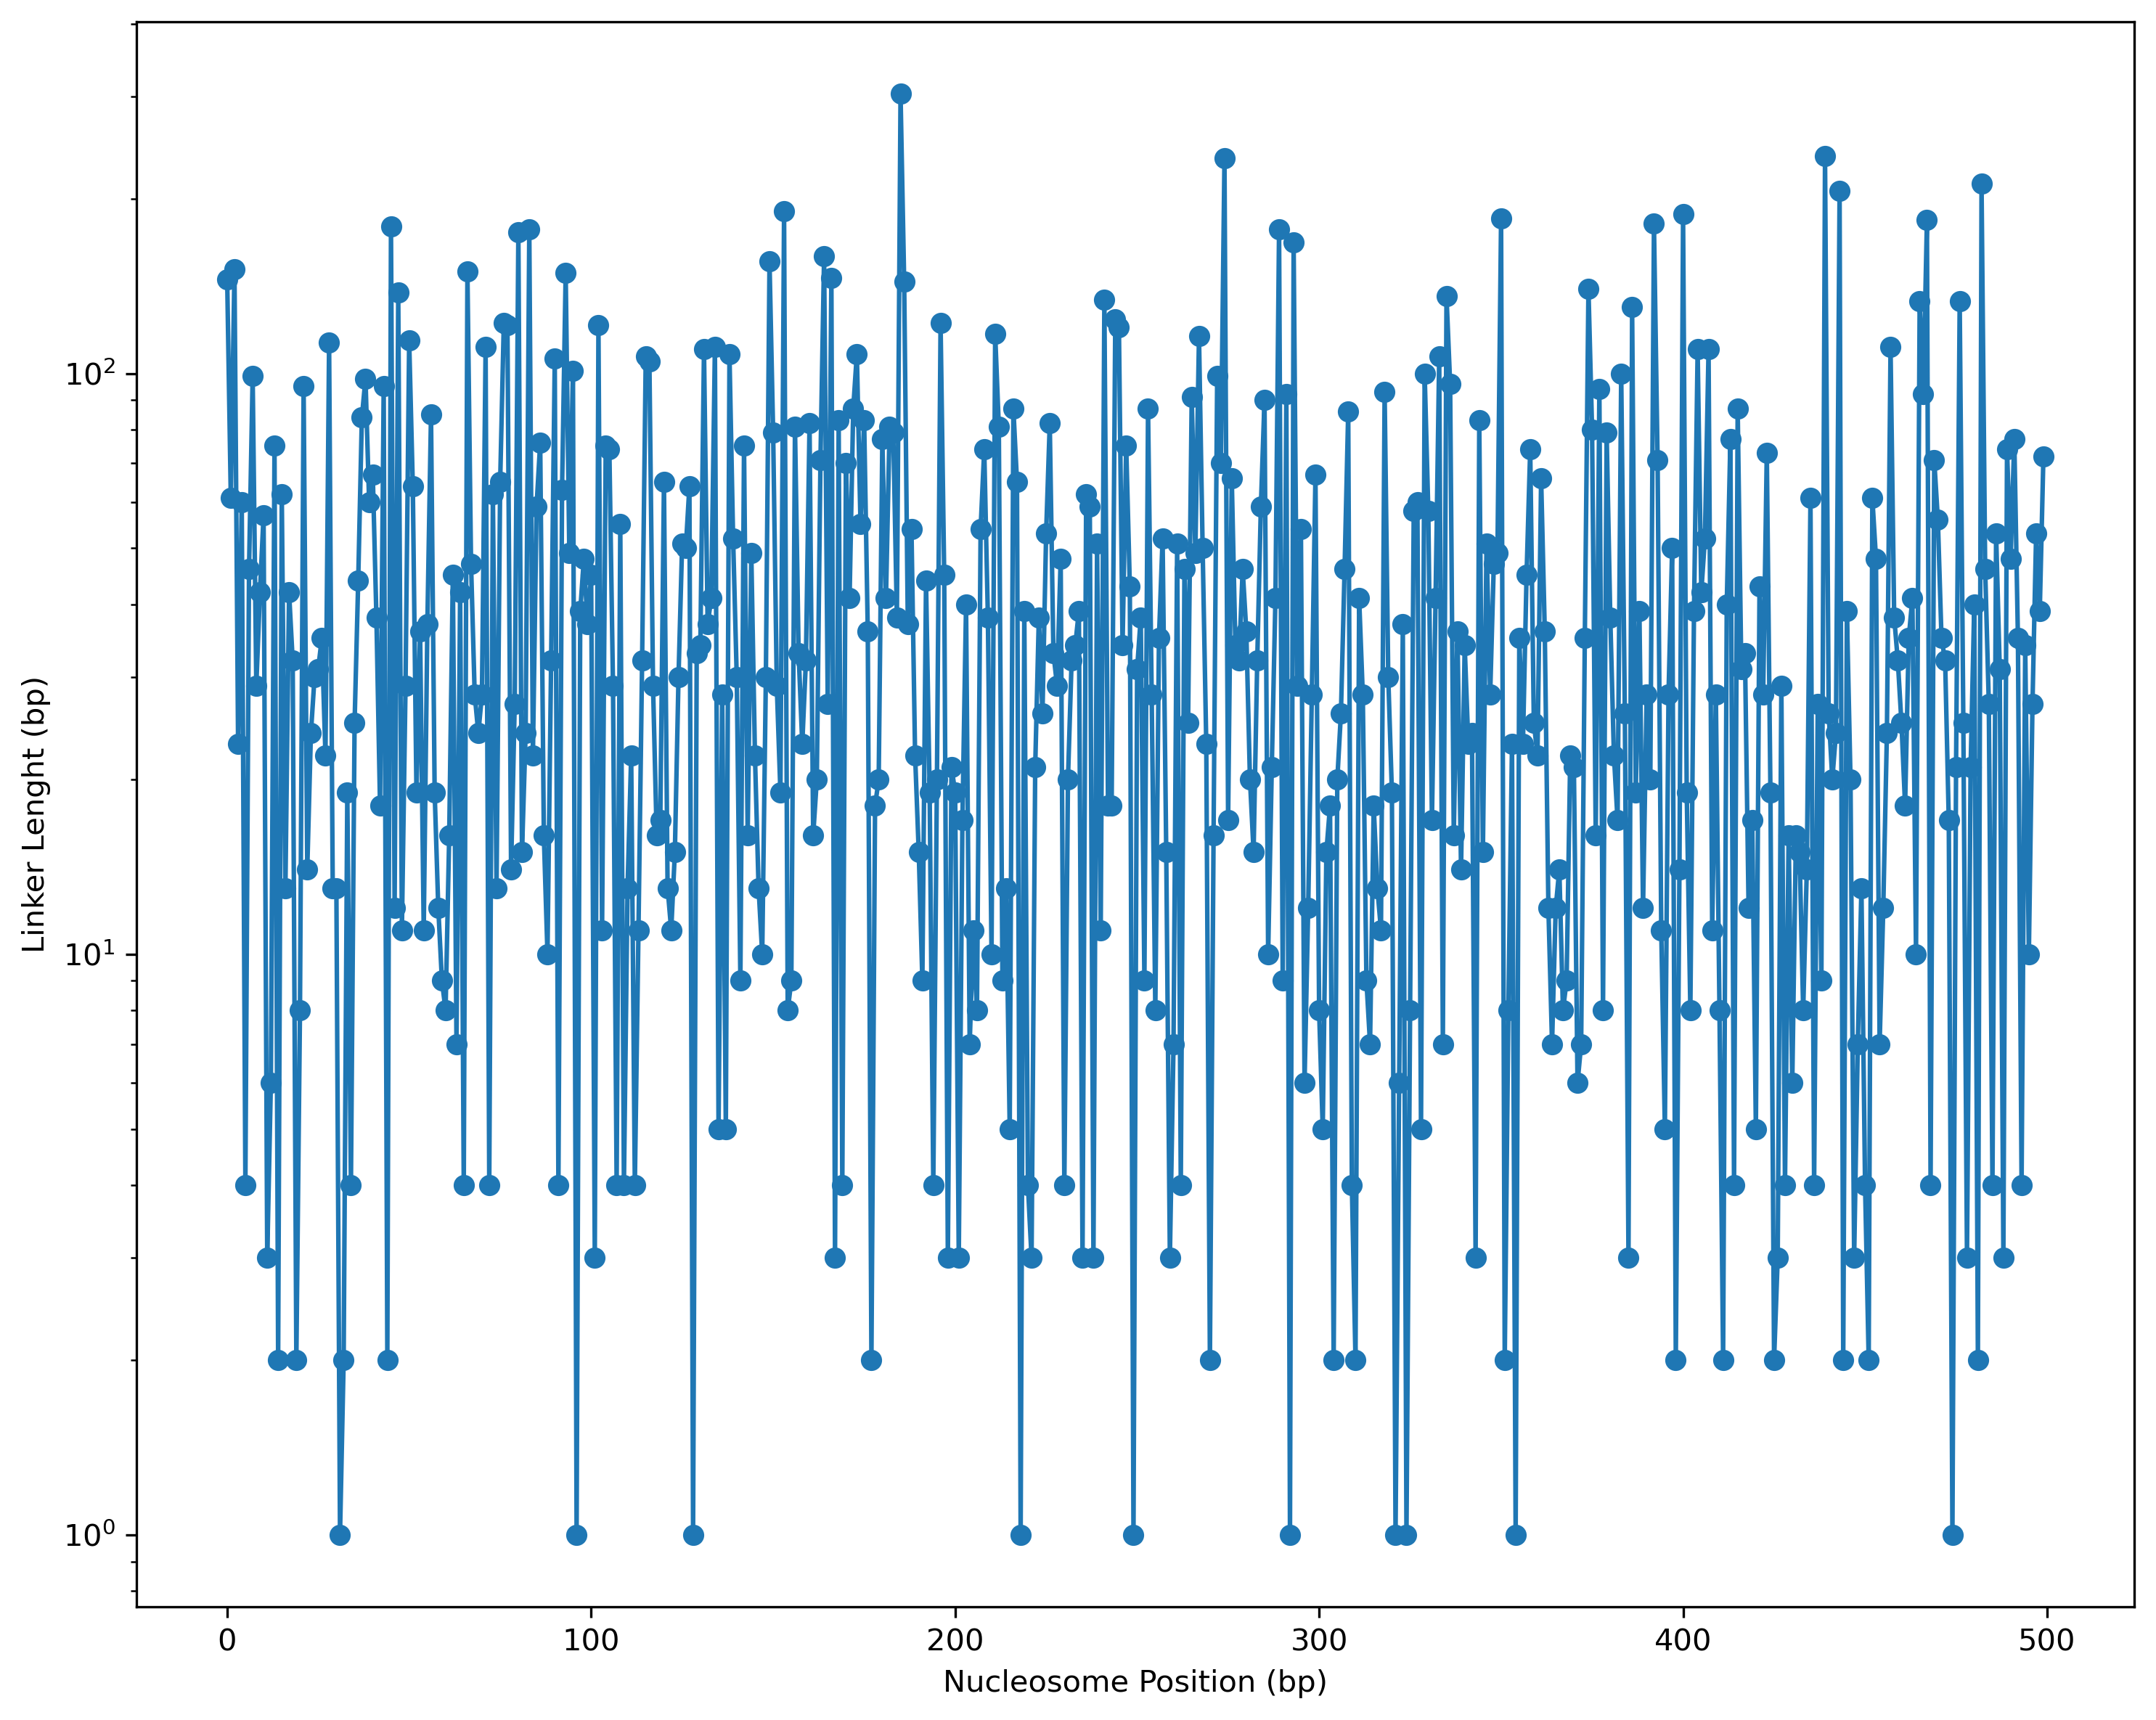

In [11]:
# Plot linker length profile
plt.figure(figsize=(10, 8), dpi=300)
plt.plot(linker_lengths, 'o-')
plt.yscale('log')
plt.xlabel("Nucleosome Position (bp)")
plt.ylabel("Linker Lenght (bp)")
plt.tight_layout()
plt.show()

#### Next Steps

- The cutoff interaction length (15.1 nm) comes from the dinucleosome paper (Machida et al. 2018)
- Try the following fractions methylated: 0.06, 0.08, 0.10
- Vary the chemical potential to get the full dynamic range for the binding isotherm (should be somewhere around -9.0 kT)
- Vary nucleosome array lengths to ensure that chain length is not affecting function
- Use WLC-stat to generate nucleosome configurations for each linker profile
- Find chemical potentials that generate partial clumping of the chromatin fiber
- Generate PDB images of chromatin configurations, and look at cluster distributions
- Mimic analysis from Clodagh C O'Shea's ChromEMT paper to compare our simulated euchromatin clustering results with experiments